Загрузка данных (1 балл)

In [2]:
import pandas as pd

df = pd.read_csv('train.csv')

print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


Визуализация распределения признаков (2 балла)

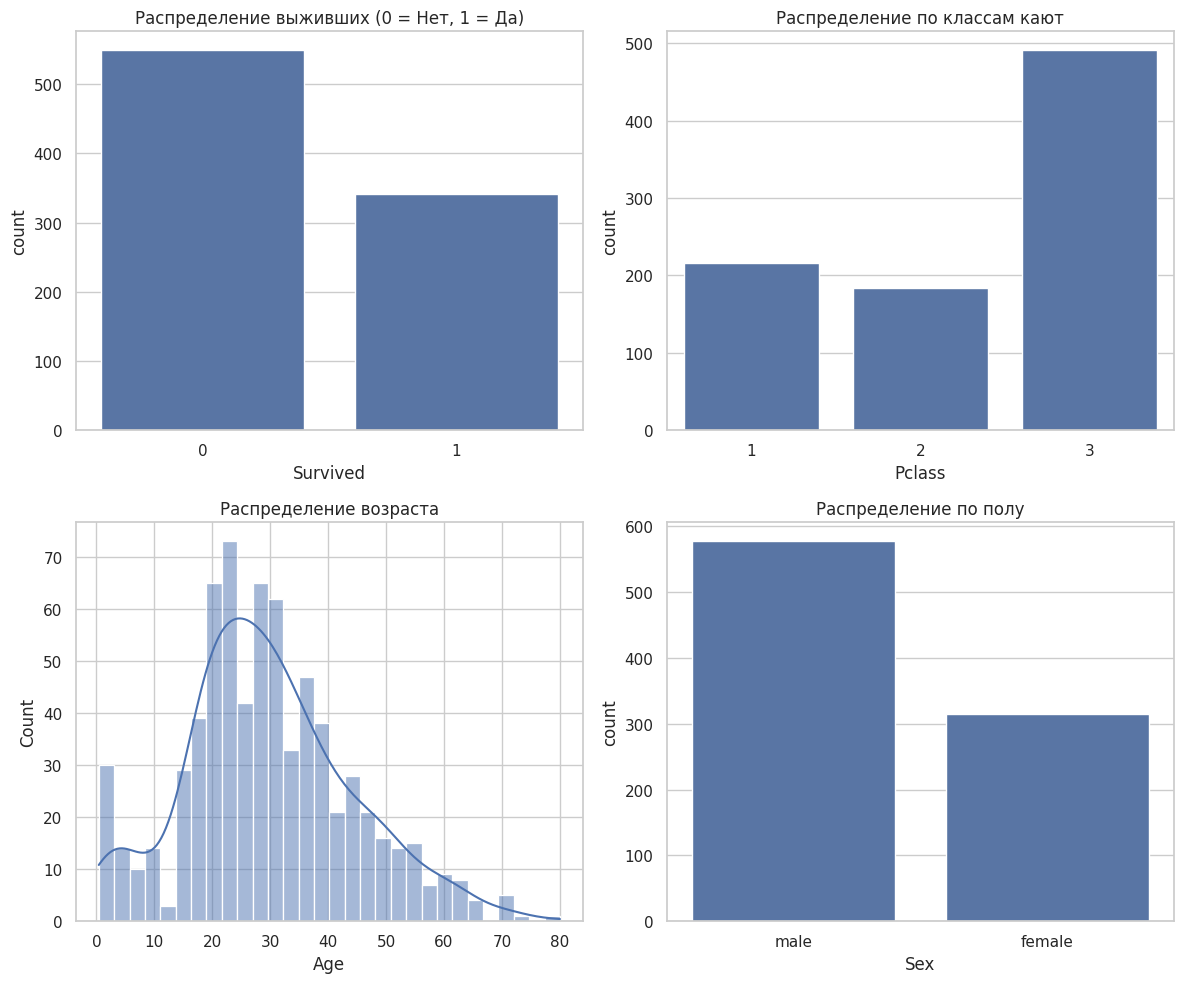

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.countplot(x='Survived', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Распределение выживших (0 = Нет, 1 = Да)')

sns.countplot(x='Pclass', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Распределение по классам кают')

sns.histplot(df['Age'].dropna(), bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Распределение возраста')

sns.countplot(x='Sex', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Распределение по полу')

plt.tight_layout()
plt.show()

Boxplot для возраста (1 балл)

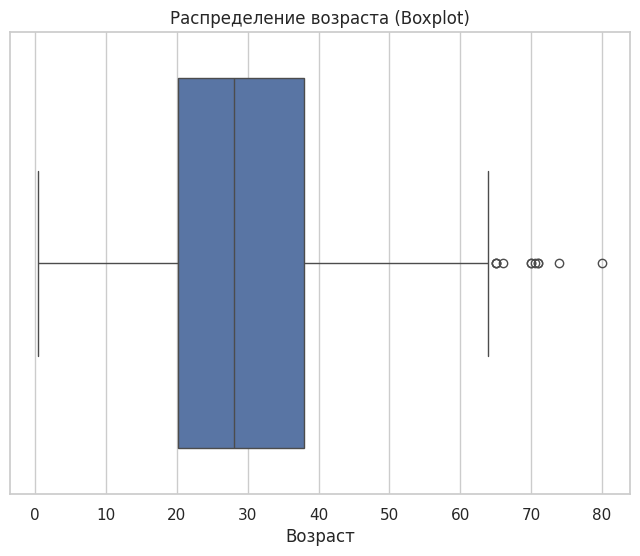

In [4]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Age'].dropna())

plt.title('Распределение возраста (Boxplot)')
plt.xlabel('Возраст')

plt.show()

**Интерпретация (1 балл):**

График показывает:

Медиану (центральная линия) — около 28 лет.

25-й и 75-й перцентили (границы ящика) — ~20 и 38 лет.

Выбросы (точки за "усами") — пожилые пассажиры (возраст > 65 лет).

Pie chart для Survived и Pclass (1 балл)

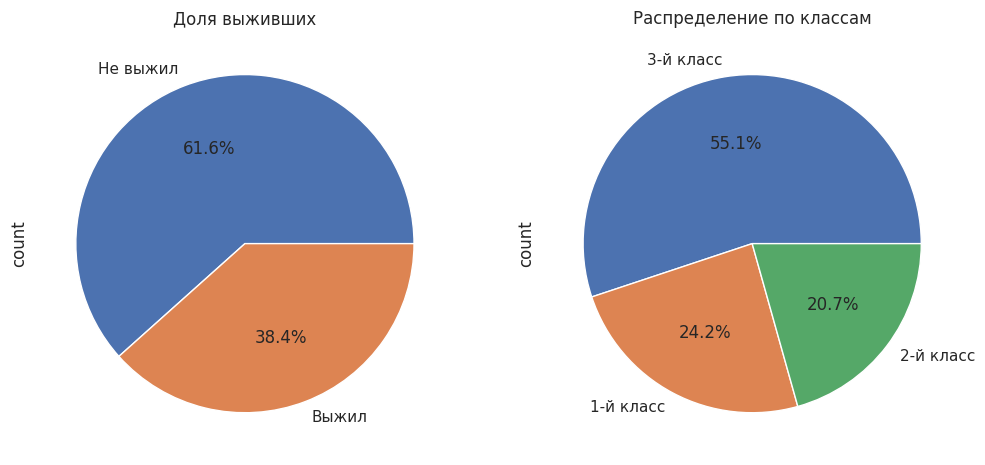

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Для Survived
df['Survived'].value_counts().plot.pie(
    autopct='%1.1f%%',
    labels=['Не выжил', 'Выжил'],
    ax=axes[0]
)
axes[0].set_title('Доля выживших')

# Для Pclass
df['Pclass'].value_counts().plot.pie(
    autopct='%1.1f%%',
    labels=['3-й класс', '1-й класс', '2-й класс'],
    ax=axes[1]
)
axes[1].set_title('Распределение по классам')

plt.show()

Pairplot для числовых переменных (1 балл)

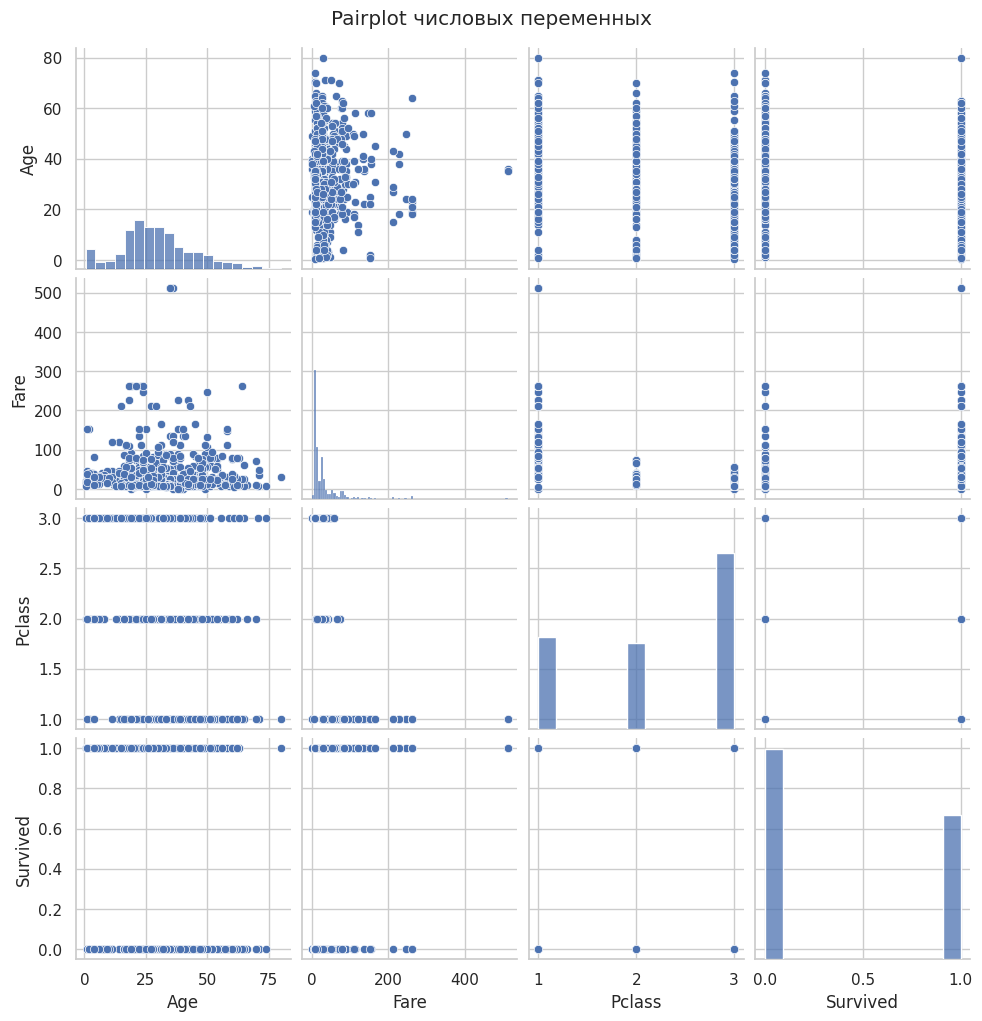

In [6]:
sns.pairplot(df[['Age', 'Fare', 'Pclass', 'Survived']].dropna())
plt.suptitle('Pairplot числовых переменных', y=1.02)
plt.show()

Sunburst plot с Plotly (2 балла)

In [7]:
import plotly.express as px

# Подготовка данных
sunburst_data = df.groupby(['Pclass', 'Sex']).size().reset_index(name='count')

# Построение графика
fig = px.sunburst(
    sunburst_data,
    path=['Pclass', 'Sex'],
    values='count',
    title='Распределение пассажиров по классам и полу'
)
fig.show()